In [1]:
%matplotlib inline
import spacy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from spacy.tokenizer import Tokenizer
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import HashingVectorizer

In [2]:
FOLDER = "/home/oscar/GitHub/test_used_tl_ML/data/"

In [3]:
df_num = pd.read_pickle(FOLDER + "df_num_norm.pkl")

In [4]:
df_num.tail()

,listing_type_id_bronze,listing_type_id_free,listing_type_id_gold,listing_type_id_gold_premium,listing_type_id_gold_pro,listing_type_id_gold_special,listing_type_id_silver,available_quantity_False,price_norm
95950,1,0,0,0,0,0,0,1,0.041719
95951,0,1,0,0,0,0,0,1,0.002916
95952,1,0,0,0,0,0,0,1,0.023818
95953,1,0,0,0,0,0,0,1,0.059921
95954,1,0,0,0,0,0,0,1,0.004916


In [5]:
len(df_num.columns)

9

In [6]:
pca_pipe = make_pipeline(PCA())
pca_pipe.fit(df_num)
modelo_pca = pca_pipe.named_steps['pca']

In [7]:
pd.DataFrame(data=modelo_pca.components_,
             columns=df_num.columns,
             index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])

,listing_type_id_bronze,listing_type_id_free,listing_type_id_gold,listing_type_id_gold_premium,listing_type_id_gold_pro,listing_type_id_gold_special,listing_type_id_silver,available_quantity_False,price_norm
PC1,-0.786583,0.604574,0.025415,0.006042,0.000181,0.036658,0.113713,-1.156227e-02,2.622833e-02
PC2,0.010188,-0.005600,-0.002437,-0.001361,0.000127,0.000157,-0.001073,-9.999275e-01,9.326033e-04
PC3,-0.335126,-0.583479,0.068632,0.014496,0.000417,0.106742,0.728317,-1.078111e-03,2.194643e-02
PC4,-0.253188,-0.296681,0.276743,0.037662,0.001004,0.723942,-0.489483,-9.310170e-04,7.863647e-02
PC5,-0.106290,-0.114468,0.837813,0.028186,0.000653,-0.500218,-0.145677,-2.479547e-03,-3.779825e-02
PC6,0.039328,0.011209,0.001234,0.023575,0.000997,-0.085356,0.009013,1.208035e-03,9.951890e-01
PC7,-0.160198,-0.162730,-0.222413,0.910513,0.004072,-0.197852,-0.171392,-1.291524e-03,-2.854903e-02
PC8,-0.152990,-0.153053,-0.154255,-0.158404,0.925810,-0.153830,-0.153278,1.467157e-04,-1.019665e-03
PC9,-0.377964,-0.377964,-0.377964,-0.377964,-0.377964,-0.377964,-0.377964,-1.647987e-17,-1.387779e-17


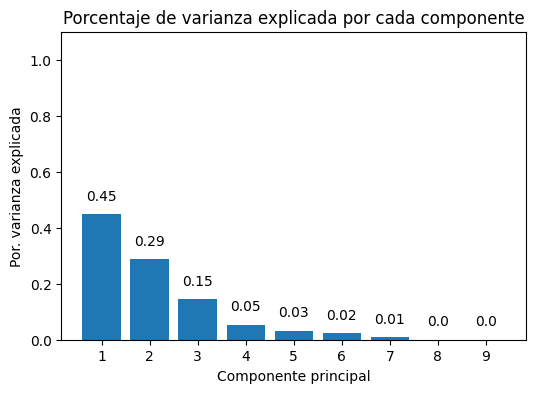

In [8]:
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(x=np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_)

for x, y in zip(np.arange(len(df_num.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(label,
                (x,y),
                textcoords="offset points",
                xytext=(0,10),
                ha='center')

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

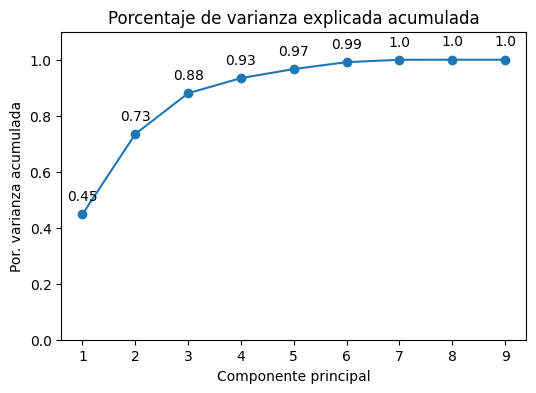

In [9]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(np.arange(len(df_num.columns)) + 1,
        prop_varianza_acum,
        marker = 'o')

for x, y in zip(np.arange(len(df_num.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

### ACP para la variable "title"

In [43]:
df_text = pd.read_pickle(FOLDER + "df_text_clean_init.pkl")

In [44]:
# df_text = df_text.sample(45000)

In [45]:
len(df_text)

95955

In [46]:
df_text.tail()

,title,Y,clean_text
95950,[pastillas de freno ebc kawasaki kx 125 b2/c1/...,new,[pastillas freno ebc kawasaki kx b2 c1 d1 83-85]
95951,[el corazon de las tinieblas - conrad - biblio...,used,[corazon tinieblas conrad biblioteca x]
95952,[juego de toalla y toallon franco valente vari...,new,[juego toalla toallon franco valente colores]
95953,[campera de cuero negra],used,[campera cuero negra]
95954,"[psicodrama y teatro moderno, jean fanchette. f2]",used,[psicodrama teatro moderno jean fanchette f2]


In [47]:
vectorizer = HashingVectorizer(n_features=8)

In [48]:
df_text["clean_text"] = [text[0] for text in df_text["clean_text"]]
df_text["title"] = [text[0] for text in df_text["title"]]
type(df_text["clean_text"].iloc[0])

str

In [49]:
df_text.tail()

,title,Y,clean_text
95950,pastillas de freno ebc kawasaki kx 125 b2/c1/d...,new,pastillas freno ebc kawasaki kx b2 c1 d1 83-85
95951,el corazon de las tinieblas - conrad - bibliot...,used,corazon tinieblas conrad biblioteca x
95952,juego de toalla y toallon franco valente vario...,new,juego toalla toallon franco valente colores
95953,campera de cuero negra,used,campera cuero negra
95954,"psicodrama y teatro moderno, jean fanchette. f2",used,psicodrama teatro moderno jean fanchette f2


In [50]:
bin_class = []
for i in range(len(df_text)):
    if df_text["Y"].iloc[i] == "new":
        bin_class.append(0)
    else:
        bin_class.append(1)               

In [51]:
df_text["label"] = bin_class

In [52]:
df_text.head()

,title,Y,clean_text,label
0,auriculares samsung originales manos libres ca...,new,auriculares samsung originales manos libres ca...,0
1,cuchillo daga acero carbón casco yelmo solinge...,used,cuchillo daga acero carbón casco yelmo solinge...,1
2,"antigua revista billiken, n° 1826, año 1954",used,antigua revista billiken n° año,1
3,alarma guardtex gx412 seguridad para el automo...,new,alarma guardtex gx412 seguridad automotor,0
4,serenata - jennifer blake,used,serenata jennifer blake,1


In [53]:
df_text.to_pickle(FOLDER + "df_text_clean.pkl")

In [67]:
tfidf = vectorizer.fit_transform(list(df_text["title"]))

In [68]:
tfidf_matrix = tfidf.toarray()

In [69]:
tfidf_matrix

array([[ 0.        ,  0.5       ,  0.        , ...,  0.5       ,
        -0.5       ,  0.        ],
       [ 0.        , -0.4472136 ,  0.        , ...,  0.4472136 ,
         0.        ,  0.4472136 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.81649658, -0.40824829],
       ...,
       [ 0.        ,  0.5       ,  0.        , ...,  0.        ,
         0.5       , -0.5       ],
       [ 0.        ,  0.        ,  0.40824829, ...,  0.        ,
         0.81649658,  0.        ],
       [ 0.81649658,  0.        ,  0.        , ...,  0.        ,
         0.40824829,  0.        ]])

In [70]:
df_tfidf = pd.DataFrame(tfidf_matrix)

In [71]:
df_tfidf.head()

,0,1,2,3,4,5,6,7
0,0.000000,0.500000,0.000000,0.000000,-0.500000,0.500000,-0.500000,0.000000
1,0.000000,-0.447214,0.000000,0.447214,0.447214,0.447214,0.000000,0.447214
2,0.000000,0.000000,0.000000,0.408248,0.000000,0.000000,-0.816497,-0.408248
3,-0.333333,0.333333,-0.333333,-0.333333,0.000000,0.333333,0.666667,0.000000
4,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000


In [72]:
pca_pipe = make_pipeline(PCA())
pca_pipe.fit(df_tfidf)
modelo_pca = pca_pipe.named_steps['pca']

In [73]:
pd.DataFrame(data=modelo_pca.components_,
             columns=df_tfidf.columns,
             index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])

,0,1,2,3,4,5,6,7
PC1,-0.003250,-0.025049,-0.016532,0.055285,-0.014751,-0.020913,-0.997592,-0.013711
PC2,0.017480,-0.024781,-0.062253,-0.993201,-0.077064,-0.008620,-0.052187,0.004569
PC3,0.658218,-0.725630,0.127410,0.029781,-0.110600,0.018181,0.015475,0.101434
PC4,0.741893,0.666927,-0.060531,0.002796,-0.018825,-0.013747,-0.017667,0.016610
PC5,0.070021,-0.020027,0.353016,-0.091087,0.927995,-0.003061,-0.024306,0.001791
PC6,0.078967,-0.154487,-0.906278,0.033294,0.339759,0.109747,0.015093,-0.140504
PC7,0.003763,0.029892,0.123734,-0.013142,-0.044979,0.973571,-0.020777,-0.182522
PC8,0.069821,-0.047627,0.121175,-0.004828,-0.051208,-0.197673,0.016892,-0.967558


In [74]:
df_tfidf.tail()

,0,1,2,3,4,5,6,7
95950,0.288675,0.0,-0.866025,0.000000,-0.288675,0.000000,0.288675,0.0
95951,-0.377964,0.0,0.000000,0.000000,0.377964,-0.377964,0.755929,0.0
95952,0.000000,0.5,0.000000,0.000000,0.500000,0.000000,0.500000,-0.5
95953,0.000000,0.0,0.408248,0.000000,-0.408248,0.000000,0.816497,0.0
95954,0.816497,0.0,0.000000,-0.408248,0.000000,0.000000,0.408248,0.0


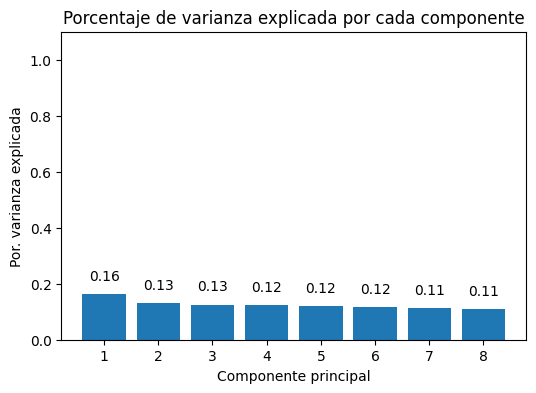

In [75]:
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(x=np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_)

for x, y in zip(np.arange(len(df_tfidf.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(label,
                (x,y),
                textcoords="offset points",
                xytext=(0,10),
                ha='center')

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

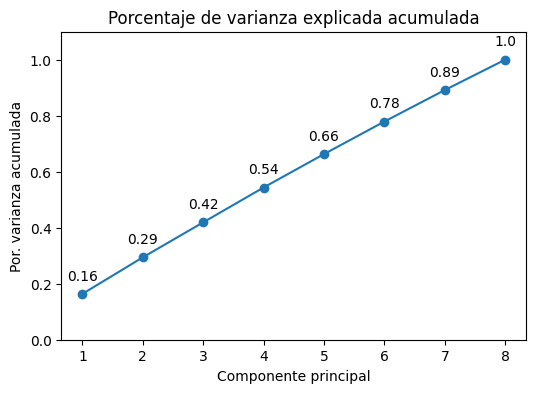

In [76]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(np.arange(len(df_tfidf.columns)) + 1,
        prop_varianza_acum,
        marker = 'o')

for x, y in zip(np.arange(len(df_tfidf.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [77]:
df_tfidf["Y"] = df_text["Y"]

In [78]:
df_tfidf.head()

,0,1,2,3,4,5,6,7,Y
0,0.000000,0.500000,0.000000,0.000000,-0.500000,0.500000,-0.500000,0.000000,new
1,0.000000,-0.447214,0.000000,0.447214,0.447214,0.447214,0.000000,0.447214,used
2,0.000000,0.000000,0.000000,0.408248,0.000000,0.000000,-0.816497,-0.408248,used
3,-0.333333,0.333333,-0.333333,-0.333333,0.000000,0.333333,0.666667,0.000000,new
4,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,used


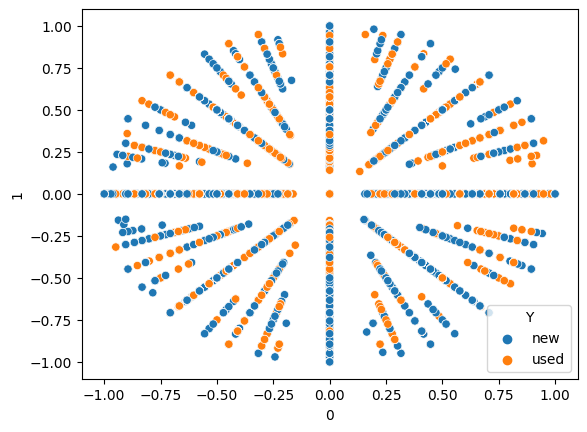

In [79]:
g =sns.scatterplot(x=0, y=1,
                  hue="Y",
                  data=df_tfidf);